# Proyecto del Día 9: Consulta de Temperaturas Interactivo por Ciudad y Mes

## Objetivo

El proyecto propuesto consistirá en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinarlo con las habilidades de desarrollo de programas con Python.

## Consigna

1. **Cargar un DataFrame** con los datos meteorológicos provistos en el archivo descargable de esta lección.
2. Asegúrate de que las **fechas** estén en el **formato correcto** para su manipulación posterior.
3. Crea un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame, y un **mes** del año.
4. Muéstrale al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

**¡Mucha suerte!**

## LECTURA DE DATOS 

In [6]:
#import libraries and read data 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\migue\OneDrive\Desktop\curso de data science\Datos+Meteorológicos_Arg_2023.csv')
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3


## LIMPIEZA Y TRANSFORMACION DE DATOS  

In [9]:
#let's get some info our this dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


In [11]:
#we realise that date has no data format so we will correct that 
df.Fecha = pd.to_datetime(df.Fecha,format = '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 1825 non-null   datetime64[ns]
 1   Ciudad                1825 non-null   object        
 2   Temperatura Maxima    1825 non-null   int64         
 3   Temperatura Minima    1825 non-null   int64         
 4   Precipitacion         1825 non-null   float64       
 5   Velocidad del Viento  1825 non-null   float64       
 6   Humedad Relativa      1825 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 99.9+ KB


In [13]:
#adding month column to data frame 
df['Month number']=df.Fecha.dt.month
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa,Month number
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8,1
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7,1
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0,1
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8,1
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9,1
...,...,...,...,...,...,...,...,...
1820,2023-12-31,Buenos Aires,15,12,0.0,17.9,49.2,12
1821,2023-12-31,Cordoba,15,7,0.0,17.8,62.4,12
1822,2023-12-31,Rosario,14,8,0.0,38.2,31.2,12
1823,2023-12-31,Mendoza,13,9,84.8,27.6,35.3,12


## ANALISIS DESCRIPTIVO DE DATOS 

In [16]:
#now it is in the correct format. Let's see some descriptive analysis 
df.describe()

,Fecha,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa,Month number
count,1825,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,2023-07-02 00:00:00.000000256,17.827945,10.191233,11.469205,24.963945,59.251890,6.526027
min,2023-01-01 00:00:00,2.000000,-3.000000,0.000000,10.000000,30.000000,1.000000
25%,2023-04-02 00:00:00,12.000000,6.000000,0.000000,17.900000,44.400000,4.000000
50%,2023-07-02 00:00:00,17.000000,10.000000,0.000000,24.900000,58.200000,7.000000
75%,2023-10-01 00:00:00,23.000000,15.000000,0.000000,32.300000,74.800000,10.000000
max,2023-12-31 00:00:00,36.000000,22.000000,119.500000,40.000000,90.000000,12.000000
std,NaN,8.139477,6.540120,27.714274,8.640341,17.282792,3.448796


## DEFINICION DE FUNCIONES 

In [19]:
# Definition of functions for data extraction from user

def ask_for_city():
    """
    Solicita al usuario el nombre de una ciudad argentina y valida que exista en el DataFrame `df`.

    Returns:
        str: Nombre de la ciudad validada, con la primera letra en mayúscula.
    
    Nota:
        Se asume que existe un DataFrame global llamado `df` con una columna 'Ciudad' que contiene los nombres válidos.
    """
    flag = 0
    while flag == 0:
        cityname = input('Type the name of a city for the consultation: ')
        cityname = cityname.capitalize()
        if df.Ciudad.isin([cityname]).sum() == 0:
            print('Invalid city name, try another Argentinian city.')
        else:
            flag = 1
    return cityname


def ask_for_month():
    """
    Solicita al usuario un número de mes (1 a 12) y valida que esté dentro del rango.

    Returns:
        int: Número del mes válido entre 1 y 12 (inclusive).
    """
    flag = 0
    while flag == 0:
        month = int(input('Type the number of a month for the consultation. For example January = 1, February = 2 ... : '))
        if month < 1 or month > 12:
            print('Invalid number of month, try one between 1 and 12, both included.')
        else:
            flag = 1
    return month


def month_number_to_name(month):
    """
    Convierte un número de mes (1 a 12) a su nombre correspondiente en inglés.

    Args:
        month (int): Número del mes (1 = January, ..., 12 = December).

    Returns:
        str: Nombre del mes correspondiente.
    """
    months = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
    name = months[month - 1]
    return name


In [21]:
def consultation_and_plots():
    """
    Solicita al usuario una ciudad argentina y un número de mes, extrae los datos climáticos correspondientes
    del DataFrame `df`, y genera gráficos de temperatura máxima, mínima y media para ese mes y ciudad.

    Proceso:
        - Solicita el nombre de una ciudad y valida su existencia en el DataFrame `df`.
        - Solicita un número de mes válido (1–12).
        - Extrae las temperaturas máximas y mínimas para esa ciudad y mes.
        - Calcula la temperatura media diaria.
        - Genera dos gráficos:
            1. Temperaturas máxima y mínima.
            2. Temperatura media.

    Requisitos:
        - `df` debe estar definido globalmente y contener al menos las columnas:
          'Ciudad', 'Month number', 'Temperatura Maxima' y 'Temperatura Minima'.
        - Se requiere la biblioteca `matplotlib.pyplot` como `plt`.

    Returns:
        None. Solo muestra los gráficos en pantalla.
    """
    # Obtención de datos
    city = ask_for_city()
    month = ask_for_month()

    # Creación de vectores
    max_temperature = df['Temperatura Maxima'][(df.Ciudad == city) & (df['Month number'] == month)]
    min_temperature = df['Temperatura Minima'][(df.Ciudad == city) & (df['Month number'] == month)]
    mean_temperature = (max_temperature + min_temperature) / 2

    # Rango del eje x
    xrange = range(1, len(max_temperature) + 1)

    # Creación de gráficos
    fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5))

    # Gráficas
    ax[0].plot(xrange, max_temperature, 'ro-')
    ax[0].plot(xrange, min_temperature, 'bo-')
    ax[1].plot(xrange, mean_temperature, 'go-')

    # Títulos y leyendas
    ax[0].set_title('Maximum and minimum temperatures in ' + month_number_to_name(month))
    ax[0].legend(['Max temp', 'Min temp'], loc='best')
    ax[1].set_title('Mean temperature in ' + month_number_to_name(month))
    ax[0].set_xlabel('Day')
    ax[1].set_xlabel('Day')

    # Ajuste de ejes
    ymax = max_temperature.max() + 1
    ymin = min_temperature.min() - 1
    ax[0].set_ylim([ymin, ymax])

    # Líneas de rejilla
    ax[0].grid()
    ax[1].grid()

    # Mostrar gráficos
    plt.show()


In [23]:
def consultation():
    """
    Inicia un sistema interactivo para generar gráficos de clima en ciudades argentinas.

    Funcionalidad:
        - Da la bienvenida al usuario.
        - Permite realizar múltiples consultas climáticas a través de la función `consultation_and_plots()`.
        - Pregunta al usuario si desea realizar otra consulta tras cada gráfico.
        - Finaliza con un mensaje de despedida cuando el usuario decide no continuar.

    Requisitos:
        - Debe existir una función llamada `consultation_and_plots()` previamente definida.
        - Se espera que el usuario proporcione entradas válidas (ciudad y mes) a través del flujo interactivo.

    Returns:
        None. El resultado se muestra a través de la consola y gráficos en pantalla.
    """
    # Greeting
    print('Welcome to our graphics system for weather in Argentinian cities')

    # Loop for plotting as many times as wanted
    while True:
        consultation_and_plots()

        # Ask if user wants to continue
        wish_to_continue = input('Do you want to plot more data? (y/n): ')
        wish_to_continue = wish_to_continue.lower()
        if wish_to_continue == 'n':
            break

    # Farewell
    print('We hope data has been properly displayed. See you soon!')


## EJECUCION DE LA CONSULTA

Welcome to our graphics system for weather in argentinian cities


Type the name of a city for the consultation: rosario
Type the number of a month for the consultation. For example January = 1, February=2 ... : 1


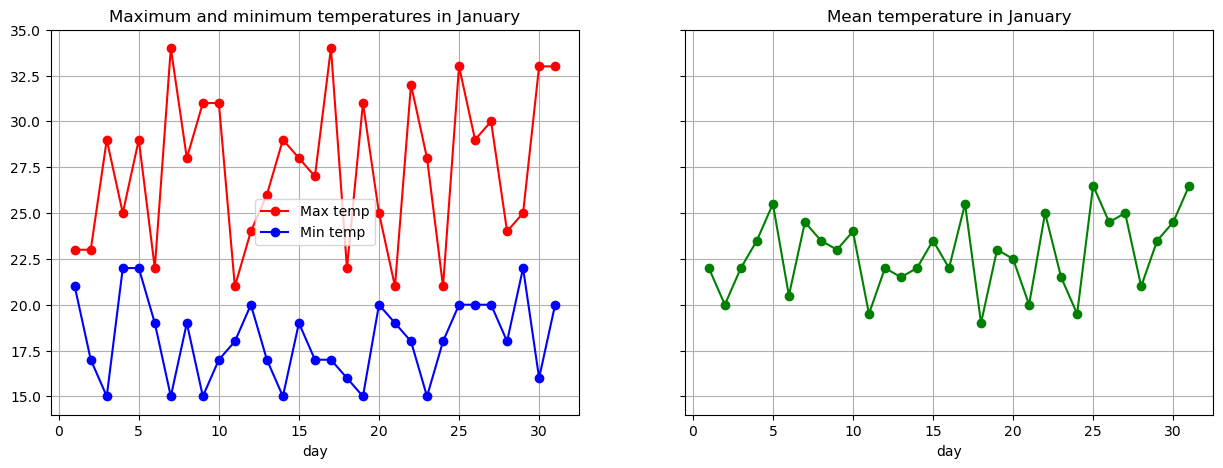

Do you want to plot more data? (y/n) tucuman
Type the name of a city for the consultation: tucuman
Type the number of a month for the consultation. For example January = 1, February=2 ... : 9


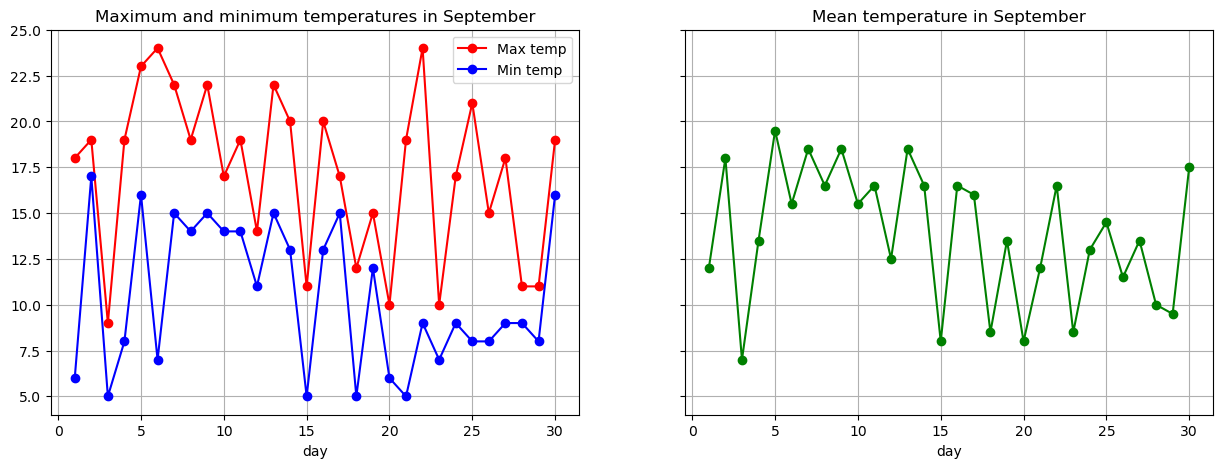

Do you want to plot more data? (y/n) n


We hope data has been properly displayed. See you soon!


In [213]:
consultation()